#### mini project 1 ####
#### Mina Ilkhani ####
#### 610398191 ####

read *train set*:

In [24]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,0.0
4,-1.540663,-0.048947,0.0
...,...,...,...
145,0.887016,-0.254848,1.0
146,-0.240418,-0.252660,0.0
147,-1.583462,-1.149453,0.0
148,-1.009593,0.135440,0.0


splite X and target(train set):

In [25]:
Xtrain = df.drop(['target'],  axis=1)
Ttrain = df['target']
trainSize = len(df)
trainSize

150

In [26]:
pd.unique(Ttrain)

array([1., 0.])

I'd prefer -1, 1 for classes instead of 0, 1

In [27]:
Ttrain=Ttrain.replace(0,-1)
pd.unique(Ttrain)

array([ 1., -1.])

adding a column of ones as biase (x0 = 1 , Y=w0x0+w1x1+w2x2)

In [28]:
ones = [1 for _ in range (trainSize)]
Xtrain.insert(0, 'x0', ones)
Xtrain

,x0,x1,x2
0,1,0.525642,0.133813
1,1,1.009394,0.925323
2,1,0.776517,-0.252655
3,1,-0.245693,-0.872614
4,1,-1.540663,-0.048947
...,...,...,...
145,1,0.887016,-0.254848
146,1,-0.240418,-0.252660
147,1,-1.583462,-1.149453
148,1,-1.009593,0.135440


In [29]:
Ttrain

0      1.0
1      1.0
2      1.0
3     -1.0
4     -1.0
      ... 
145    1.0
146   -1.0
147   -1.0
148   -1.0
149   -1.0
Name: target, Length: 150, dtype: float64

read test set:

In [30]:
import pandas as pd
df = pd.read_csv("test.csv")

splite X and target(train set) and replacing 0s with -1 and insert a hepler row os 1s which has no effect on test set :

In [31]:
Xtest = df.drop(['target'],  axis=1)
Ttest = df['target']
Ttest=Ttest.replace(0,-1)
testSize = len(Ttest)
ones = [1 for _ in range(testSize)]
Xtest.insert(0, 'x0', ones)
testSize

50

In [32]:
Xtest.head()

,x0,x1,x2
0,1,-0.723805,0.798472
1,1,1.393432,-0.617441
2,1,1.018925,0.970799
3,1,0.934384,0.568916
4,1,1.218155,0.393373


In [33]:
Ttrain.head()

0    1.0
1    1.0
2    1.0
3   -1.0
4   -1.0
Name: target, dtype: float64

A function for plotting dataset and the class of each data and also showing the decision boundary:

In [147]:
import matplotlib.pylab as plt
import numpy as np

def visualization(two_class_data_set_3d,target, size,plot_decision_boundary_flag, w= None):

    for i in range (size):
        if target[i] == -1:
            plt.scatter(two_class_data_set_3d['x1'][i],two_class_data_set_3d['x2'][i],s=10, color ="black" )
        elif target[i] == 1:
            plt.scatter(two_class_data_set_3d['x1'][i],two_class_data_set_3d['x2'][i],s=10, color ="red")
    
    if plot_decision_boundary_flag: # ploting decision boundary
        xMin = two_class_data_set_3d['x1'].min()
        xMax = two_class_data_set_3d['x1'].max()
        yMin = (-w[0]-(w[1]*xMin))/w[2]
        yMax = (-w[0]-(w[1]*xMax))/w[2]
        plt.plot([xMin, xMax],[yMin, yMax], linestyle='-')  # solid
    
    
    plt.show()


ploting the train set:

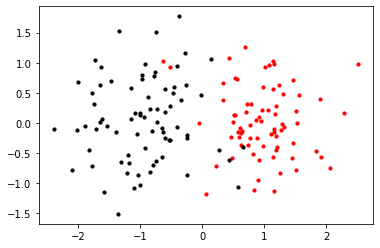

In [148]:
visualization(Xtrain,Ttrain , trainSize,False)

random weights in range 0, 1

In [36]:
def initialization_weights():
    weights = np.random.rand(3, 1)
    return [weights[i][0] for i in range(3) ]

predicting 1 or -1

In [37]:
def prediction(x,w):
    return np.sign(np.inner(w,x))

err = wrong predicted  data / whole data

In [38]:
def calculate_error(w, X, T,size):
    err = 0
    for i in range(size):
        if prediction(X.iloc[i],w) != T.iloc[i]:
            err += 1
    err /= size
    return err

**Pocket based perceptron:**

In [120]:
def learning(weights):
    iteration = 0
    max_iteration = 15000
    err = calculate_error(weights, Xtrain,Ttrain,trainSize)
    print("err before learning:", err)
    while (err != 0 and (iteration<max_iteration)):
        # print(err)
        i = iteration % trainSize
        x = Xtrain.iloc[i]
        y = Ttrain.iloc[i]
        y_hat = prediction(x,weights)
        if y_hat != y:
            weights_new = weights + (np.inner(x,y))*0.3
            err_new = calculate_error(weights_new, Xtrain, Ttrain, trainSize)
            if err_new < err:
                print("updating weights in itration", i,"\n new err:", err )
                weights = weights_new
                err = err_new
        iteration += 1
    return weights
        

## learning: ##

# first try: #

In [172]:
weights = initialization_weights()
weights

[0.6392201505798271, 0.2531090236125686, 0.6144672309034693]

visualizing decision boundaries before learning:

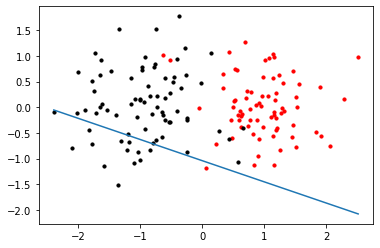

In [173]:
visualization(Xtrain,Ttrain , trainSize,True ,weights)

In [174]:
weights = learning(weights)

print('new weights:',weights)

err before learning: 0.4266666666666667
updating weights in itration 3 
 new err: 0.4266666666666667
updating weights in itration 5 
 new err: 0.32
updating weights in itration 15 
 new err: 0.1
updating weights in itration 20 
 new err: 0.06
updating weights in itration 35 
 new err: 0.05333333333333334
new weights: [-0.26077985  0.63743365  0.1253844 ]


visualizing decision boundaries after learning:

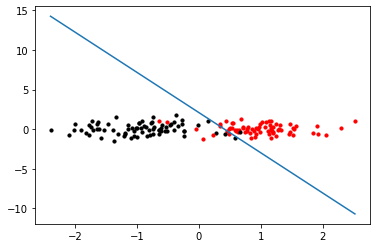

In [175]:

visualization(Xtrain,Ttrain , trainSize, True ,weights)

on test set (for the first try):

In [176]:
calculate_error(weights,Xtest,Ttest,testSize)

0.1

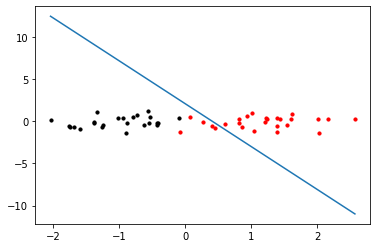

In [177]:
visualization(Xtest, Ttest, testSize,True ,weights)

the weights have been updated twice and err is 0.05 on the train set and 0.1 on the test set
it has been converged as the weights didn't after 32 iterations

## second try: ##

In [192]:
weights = initialization_weights()
weights

[0.9433299410939947, 0.31231144708921954, 0.4582933624766876]

visualizing decision boundaries before learning:

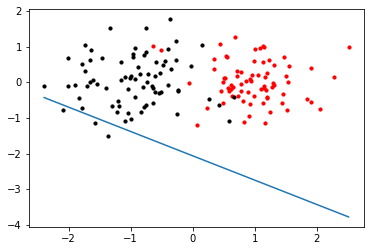

In [179]:
visualization(Xtrain,Ttrain , trainSize,True ,weights)

learning:

In [193]:
weights = learning(weights)

print('new weights:',weights)

err before learning: 0.4866666666666667
updating weights in itration 3 
 new err: 0.4866666666666667
updating weights in itration 4 
 new err: 0.36
updating weights in itration 5 
 new err: 0.15333333333333332
updating weights in itration 8 
 new err: 0.08
updating weights in itration 111 
 new err: 0.06
new weights: [ 0.04332994  0.89857024 -0.11629423]


visualizing decision boundaries after learning:

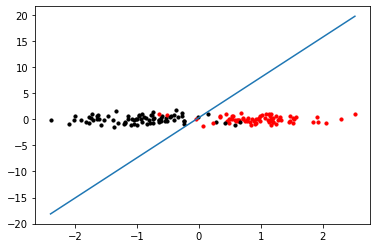

In [181]:
visualization(Xtrain,Ttrain , trainSize, True ,weights)

on test set (for the second try):

In [182]:
calculate_error(weights,Xtest,Ttest,testSize)

0.0

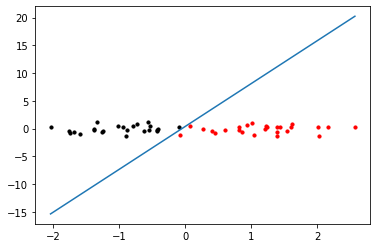

In [183]:
visualization(Xtest, Ttest, testSize,True ,weights)

On the second try the decision boundary was awful at first and the error was 48! But after 111 iterations it converged and error decreased impressively.
err on the test set is less than the error on the train set, and one of the reasons is that the test set is smaller than the train set and it's simpler than the train set.

now let's try for the last time.

## third try: ##

In [189]:
weights = initialization_weights()
weights

[0.8768169885600632, 0.4854092784610977, 0.24653574267577838]

visualizing decision boundaries before learning:

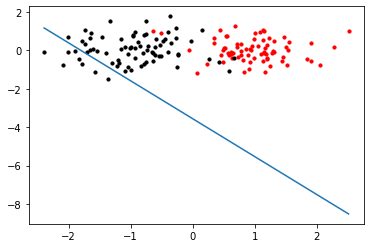

In [190]:
visualization(Xtrain,Ttrain , trainSize,True ,weights)

learining:

In [191]:
weights = learning(weights)

print('new weights:',weights)

err before learning: 0.4533333333333333
updating weights in itration 3 
 new err: 0.4533333333333333
updating weights in itration 5 
 new err: 0.29333333333333333
updating weights in itration 8 
 new err: 0.1
new weights: [-0.02318301  0.62581125 -0.3406343 ]


visualizing decision boundaries after learning:

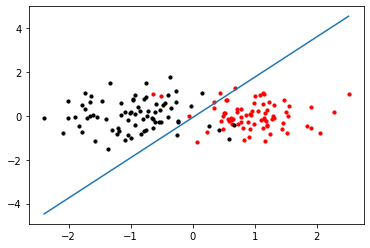

In [187]:
visualization(Xtrain,Ttrain , trainSize, True ,weights)

on test set (for the third try):

In [144]:
calculate_error(weights,Xtest,Ttest,testSize)

0.02

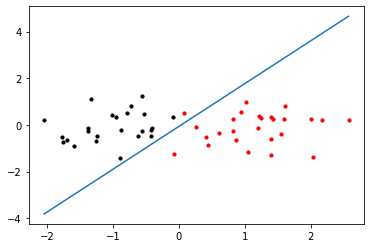

In [188]:
visualization(Xtest, Ttest, testSize,True ,weights)